# Ayudantía 4

**Magister en Finanzas**

**Autor:** Gabriel Cabrera G.

**Fecha:** 04 de Septiembre del 2019

##  Gradiente Descendiente

1. Genere una variable $X$ e $y$ que contengan 100 observaciones con las siguientes características:

    a. $X = 3*Aleatorio$
    
    b. $y = 2 + 2*X + Aleatorio$
    
    El parámetro $Aleatorio$ se refiere a la función `np.random()`. Utilice una semilla igual a 42.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

X = 3*np.random.rand(100, 1)
y = 2 + 2*X + np.random.randn(100, 1)

2. Estime los parámetros $\hat{\theta}$ utilizando la ecuación normal.

$$
\hat{\theta}=(\mathbf{X'}\mathbf{X})^{-1}\mathbf{X'y}
$$

In [8]:
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[2.21509616],
       [1.84674226]])

3. Realice la predicción utilizando los parámetros $\hat{\theta}$ encontrados en (2), luego gráfiquelos. 

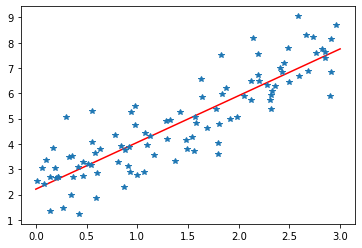

In [5]:
X_new = np.array([[0], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
y_predict

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "*")
# plt.axis([0, 2, 0, 15])
plt.show()


4. Compruebe que los parámetros $\hat{\theta}$ obtenidos mediante la ecuación normal son equivalentes al utilizar la librería Scikit-Learn.

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

lin_reg.intercept_[0], lin_reg.coef_[0][1]

(2.2150961575467485, 1.8467422576256567)

In [9]:
lin_reg.predict(X_new_b)

array([[2.21509616],
       [7.75532293]])

5. Programe los siguientes algoritmos:

    a. Batch Gradient Descent
    
    

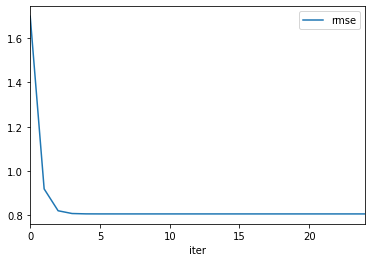

In [7]:
eta = 0.05 # learning rate
n_iterations = 25
theta_history = []
cost_history = []
m = 100
theta_gd = np.random.randn(2,1)

def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.square(predictions-y))
    return cost

# random initialization
for ite in range(n_iterations):    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd = theta - eta * gradients
    theta_history.append(theta_gd.T)
    cost_history.append(cal_cost(theta_gd, X_b, y))

theta
theta_gd

mse_df = pd.DataFrame(cost_history).reset_index()
mse_df.columns = ['iter', 'rmse']
mse_df.plot(x='iter', y='rmse', kind='line')

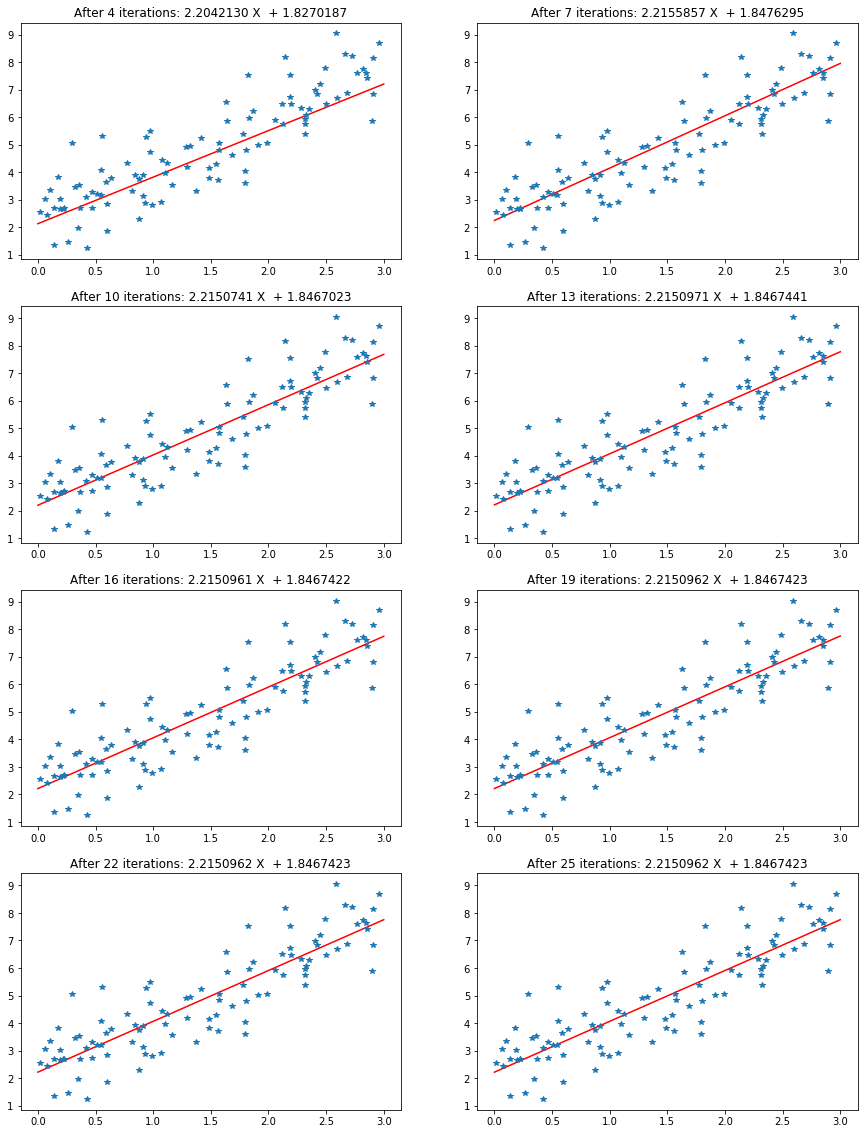

In [8]:
plt.figure(figsize=(15,20))

for i in np.arange(1, 9):
    num_fig = i*3 + 1 
    X_newb = np.array([[0], [3]])
    
    X_new_bb = np.c_[np.ones((2, 1)), X_newb] # add x0 = 1 to each instance
    Y_pred = X_new_bb.dot(theta_history[i].T)
    
    plt.subplot(4,2,i)
    
    plt.plot(X_newb, Y_pred, "r-")
    plt.plot(X, y, "*")
    title_str = 'After %d iterations: %0.7f X  + %0.7f'%(num_fig, theta_history[i*3][0,0], theta_history[i*3][0,1])
    plt.title(title_str)

b. Stochastic Gradient Descent
    
    

In [12]:
n_epochs = 50
t0, t1 = 5, 50

# learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
 
theta_sgd = np.random.randn(2,1)

# random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients

theta_sgd

array([[2.19155178],
       [1.80270779]])

In [13]:
#%%
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.05, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([2.19501794]), array([1.81427259]))

c. Mini-batch gradient descent
    


In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta_mbgd = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_mbgd) - yi)
        eta = learning_schedule(t)
        theta_mbgd = theta_mbgd - eta * gradients
        theta_path_mgd.append(theta_mbgd)

theta_mbgd

array([[2.30998051],
       [1.95202441]])

Explique cada procedimiento y utilícelos para obtener los parámetros $\hat{\theta}$.

## Aplicación 1: Regresión lineal

El archivo \dataset{data\_usd\_clp.xlsx} contiene datos de divisas extranjeras, entre ellas, el dolar. Utilizando las variables de la base de datos, realice la predicción de la variación del precio del dolar utilizando una regresión lineal mediante la librería Scikit-Learn. Considere los siguientes pasos:

1. Importe la base de datos a su espacio de trabajo (*workspace*).

In [1]:
import pandas as pd
excel_file= 'data_usd_clp.xlsx'
data = pd.read_excel(excel_file)

2. Construya hasta el tercer rezago (*lag*) de cada variable más la variación del precio del dolar. De ser necesario, programe una función que facilite la implementación de rezagos.


In [2]:
data_dif=data.diff()

data_lag1=data_dif.shift(1)
cols_lag1= [col+"_lag1" for col in data.columns]
data_lag1.columns=cols_lag1

data_lag2=data_dif.shift(2)
cols_lag2= [col+"_lag2" for col in data.columns]
data_lag2.columns=cols_lag2

data_lag3=data_dif.shift(3)
cols_lag3= [col+"_lag3" for col in data.columns]
data_lag3.columns=cols_lag3

data_con_lags=pd.concat([data_dif,data_lag1,data_lag2, data_lag3], axis=1)

In [3]:
def crealags(base,lag_ini,nrolags):
    data_dif = base.diff()
    for lags in range(lag_ini,  nrolags+1): #Parte del rezago que definamos, no desde 1
        slag=base.shift(lags).copy(True)
        slag.columns=[str(col) + '_lag'+str(lags) for col in base.columns]
        if lags==lag_ini: #Bloque de datos inicial
            rezagos=pd.concat([slag], axis=1).copy(True) #genera primer bloque de datos 
        else: rezagos=pd.concat([data_dif, rezagos, slag], axis=1).copy(True) #genera el resto del bloque de datos        
    return rezagos

data_rezagos = crealags(data_dif,1,3).dropna()

In [5]:
data_rezagos = data_con_lags.dropna()
Date = data.iloc[4:len(data), 0]
data_rezagos.index = Date
data_rezagos = data_rezagos.drop(columns=['Date', 'Date_lag1', 'Date_lag2', 'Date_lag3'])

In [6]:
data_rezagos.head(10)

,USDCLP Curncy,USSW1 Curncy,USSW10 Curncy,CHSWP1 ICCH Curncy,CHSWP10 Curncy,CCHIL1U5 CBIN Curncy,HGA Comdty,CL1 Comdty,VIX Index,JPY Curncy,...,USDCLP Curncy_lag3,USSW1 Curncy_lag3,USSW10 Curncy_lag3,CHSWP1 ICCH Curncy_lag3,CHSWP10 Curncy_lag3,CCHIL1U5 CBIN Curncy_lag3,HGA Comdty_lag3,CL1 Comdty_lag3,VIX Index_lag3,JPY Curncy_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,-1.94,0.0010,0.0674,0.00,0.03000,-3.123,-1.80,-0.20,-0.12,-0.10,...,-3.066,-0.0100,0.0765,0.03,0.00000,-0.124,6.30,1.02,-4.70,0.79
2013-01-04,0.70,0.0085,-0.0095,-0.01,0.02000,-0.172,-2.05,0.17,-0.73,0.91,...,-1.022,-0.0030,0.0000,0.01,0.00000,-0.343,4.25,0.65,-1.67,-0.05
2013-01-07,-1.78,-0.0020,-0.0090,0.01,0.03000,1.669,-1.25,0.10,-0.04,-0.36,...,-1.022,-0.0005,0.0386,0.01,0.03000,-2.008,4.25,0.65,-1.67,0.64
2013-01-08,0.91,-0.0050,-0.0360,-0.01,-0.02501,1.156,-0.30,-0.04,-0.17,-0.74,...,-1.940,0.0010,0.0674,0.00,0.03000,-3.123,-1.80,-0.20,-0.12,-0.10
2013-01-09,-1.30,-0.0090,-0.0035,-0.02,-0.01499,-1.325,0.15,-0.05,0.19,0.83,...,0.700,0.0085,-0.0095,-0.01,0.02000,-0.172,-2.05,0.17,-0.73,0.91
2013-01-10,-0.17,0.0025,0.0367,0.01,0.01000,0.830,4.30,0.72,-0.32,0.90,...,-1.780,-0.0020,-0.0090,0.01,0.03000,1.669,-1.25,0.10,-0.04,-0.36
2013-01-11,1.57,0.0060,-0.0218,-0.02,0.00000,0.632,-4.95,-0.26,-0.13,0.40,...,0.910,-0.0050,-0.0360,-0.01,-0.02501,1.156,-0.30,-0.04,-0.17,-0.74
2013-01-14,1.43,-0.0065,-0.0254,0.01,-0.02000,0.105,-1.60,0.58,0.16,0.30,...,-1.300,-0.0090,-0.0035,-0.02,-0.01499,-1.325,0.15,-0.05,0.19,0.83
2013-01-15,1.27,0.0030,-0.0079,0.00,0.00000,1.418,0.15,-0.86,0.03,-0.69,...,-0.170,0.0025,0.0367,0.01,0.01000,0.830,4.30,0.72,-0.32,0.90


3. Utilice el año `2015-06-19` como corte para generar su muestra de *training* y de *testing*. Luego realice las transformaciones pertinentes.

In [7]:
y = data_rezagos.iloc[:,0] 
x = data_rezagos.iloc[:,1:-1]

year_corte = '2015-06-19 00:00:00'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_tr = scaler.fit_transform(x[x.index < year_corte].copy(True))
y_tr = y[y.index < year_corte].copy(True)

x_tst = scaler.transform(x[x.index > year_corte].copy(True))
y_tst = y[y.index > year_corte].copy(True)

4. Use las métricas MAE (*mean absolute error*) y RMSE (*root mean square error*) para medir el *accuracy* de su modelo.

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
modelo = SGDRegressor()  # creo el obj regresor SGD vacio
modelo = modelo.fit(x_tr, y_tr) #lo entreno i.e. encuentro los parametros theta optimos para la data

thetas = modelo.coef_ #pido los coeficientes

preds_tr = modelo.predict(x_tr) # creo las predicciones en la muestra de prueba
mae_tr = mean_absolute_error(y_tr,preds_tr)
rmse_tr = (mean_squared_error(y_tr,preds_tr))**0.5
    
mae_tr

2.024035255118216

In [10]:
rmse_tr

2.6110462365467146

In [11]:
preds_tst = modelo.predict(x_tst)
mae_tst = mean_absolute_error(y_tst,preds_tst)
rmse_tst = (mean_squared_error(y_tst,preds_tst))**0.5

mae_tst

2.794072670905507

In [12]:
rmse_tst

3.5438802492357033

5. Genere dos gráficos de linea, el primero que muestre la relación entre la muestra de *training* con su predicción y el segundola relación entre la muestra de *testing* con su predicción.

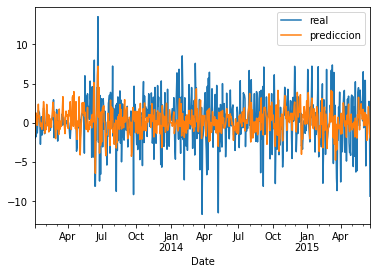

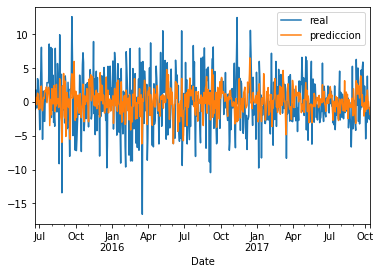

In [14]:
y_tr = pd.DataFrame(y_tr)
preds_tr = pd.DataFrame(preds_tr,index=y_tr.index,columns=y_tr.columns)

data_tr = pd.concat([y_tr,preds_tr],axis=1)
data_tr.columns = ["real","prediccion"]
data_tr.plot()

y_tst = pd.DataFrame(y_tst)
preds_tst = pd.DataFrame(preds_tst,index=y_tst.index,columns=y_tst.columns)

data_tst = pd.concat([y_tst,preds_tst],axis=1)
data_tst.columns = ["real","prediccion"]
data_tst.plot()